In [7]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [2]:
model = VGG16()
model.summary()

553467096/553467096 [==============================] - 61s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

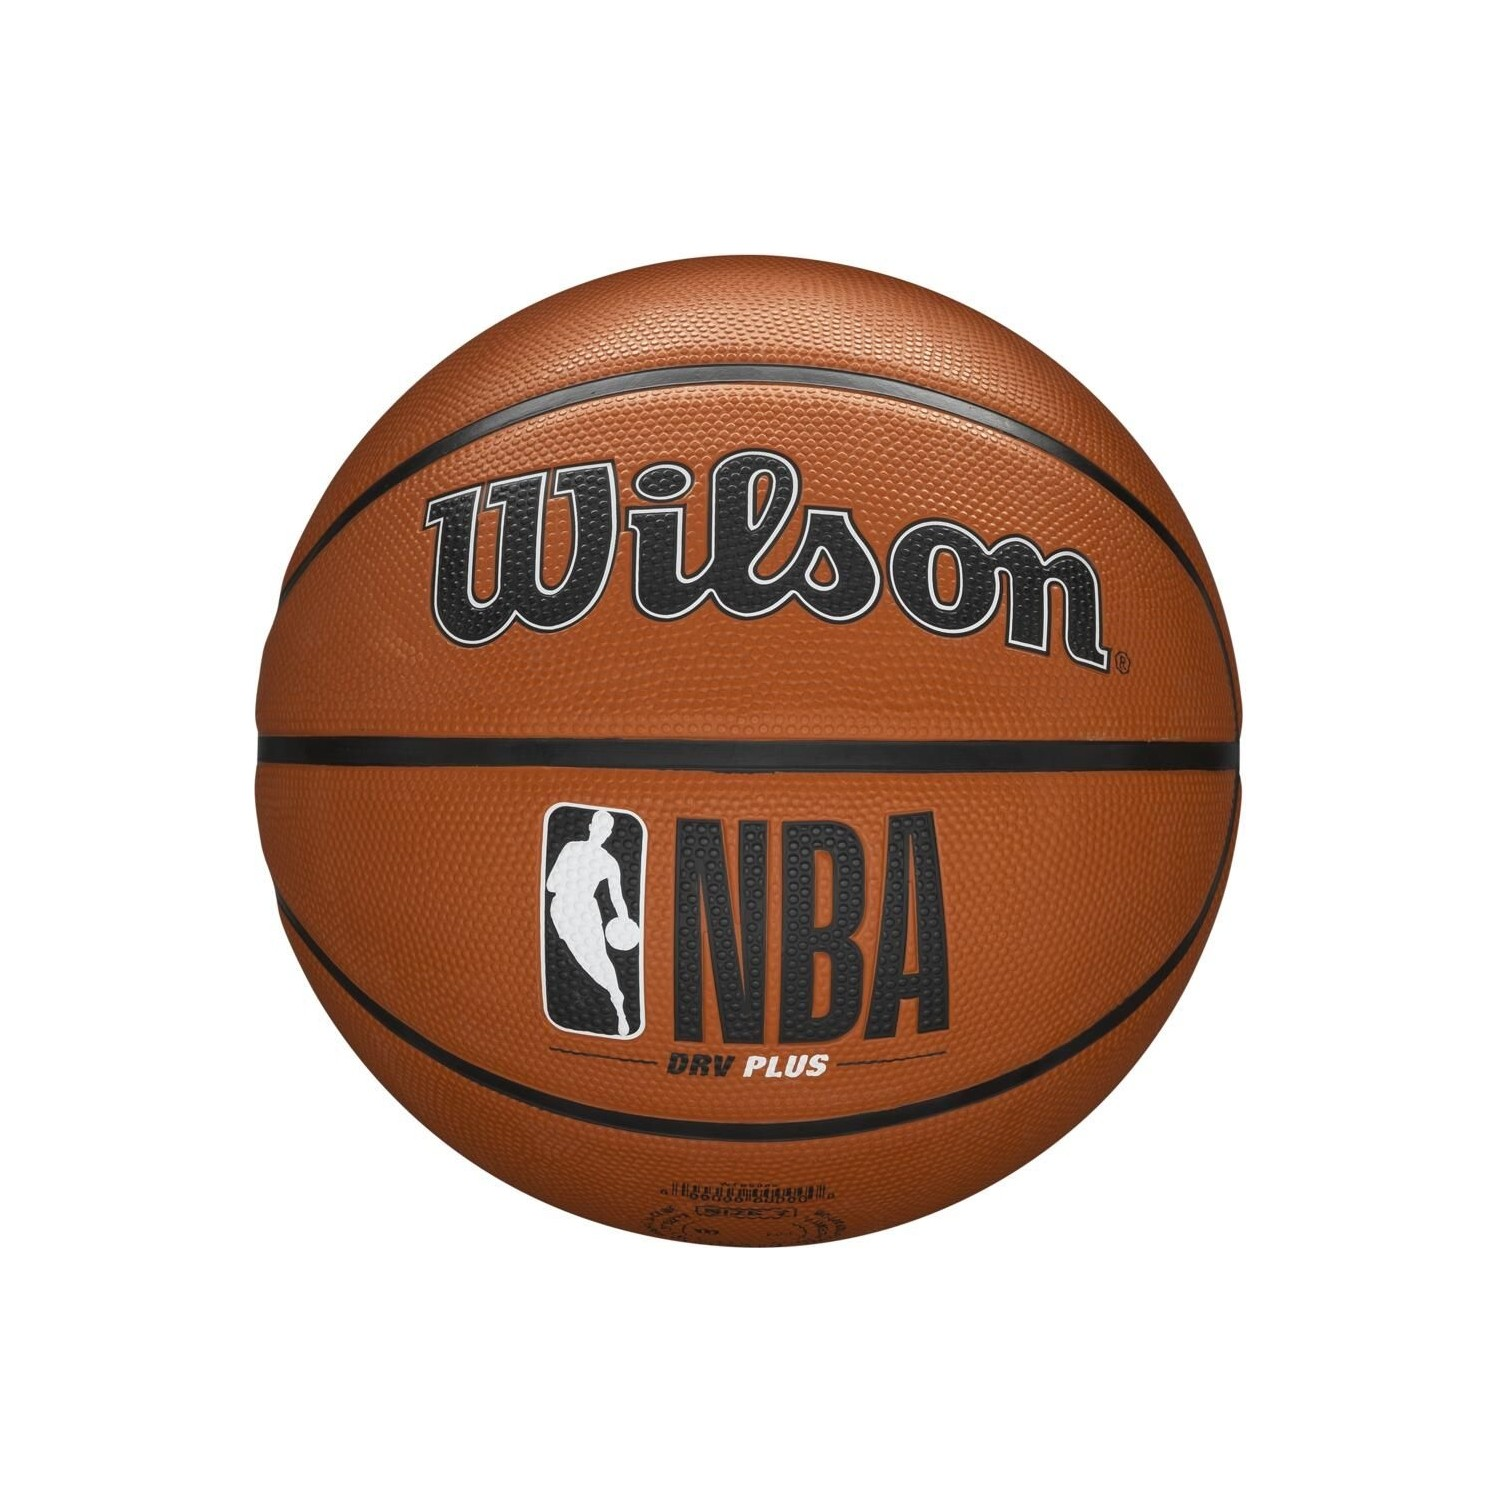

In [4]:
resim = image.load_img("110000081561235.jpg")
display(resim)

In [6]:
resim = image.load_img("110000081561235.jpg",color_mode="rgb",target_size=(224,224))
resim = image.img_to_array(resim)
resim = np.expand_dims(resim,axis=0)

tahmin = model.predict(resim)
tahmin

1/1 [==============================] - 3s 3s/step


array([[7.26656424e-07, 2.66077933e-07, 1.18757747e-07, 8.09388041e-08,
        5.43029621e-08, 1.78991264e-04, 3.16878115e-08, 5.60589285e-07,
        1.36158974e-06, 2.51527308e-06, 2.36444151e-07, 3.68956137e-08,
        5.71664138e-08, 3.50453007e-07, 4.41302120e-07, 2.81475792e-07,
        1.12409275e-07, 2.39243718e-06, 5.05141543e-07, 4.08202766e-07,
        3.87825850e-07, 3.99484037e-07, 1.33654652e-07, 4.51629887e-07,
        3.53162903e-07, 1.86456680e-06, 2.03766490e-06, 5.80311189e-06,
        1.04058745e-06, 4.06014180e-07, 1.40472594e-07, 1.07627798e-07,
        1.50496078e-06, 1.56031632e-07, 6.63053811e-07, 5.01469913e-06,
        6.35366268e-06, 1.44739761e-06, 6.17325168e-06, 1.80563163e-07,
        1.31074302e-07, 1.03655634e-06, 5.16529667e-07, 1.09768621e-06,
        8.06600553e-07, 7.00715930e-07, 7.76955389e-08, 5.13422378e-07,
        7.49966347e-08, 1.05953724e-07, 3.78336779e-07, 5.36381276e-06,
        4.39269461e-05, 6.69712972e-06, 2.13313072e-07, 1.308172

In [8]:
p = decode_predictions(tahmin)
p

35363/35363 [==============================] - 0s 1us/step


[[('n03314780', 'face_powder', 0.35620078),
  ('n04019541', 'puck', 0.3381091),
  ('n04118538', 'rugby_ball', 0.1088123),
  ('n03445777', 'golf_ball', 0.027275814),
  ('n02802426', 'basketball', 0.022813693)]]

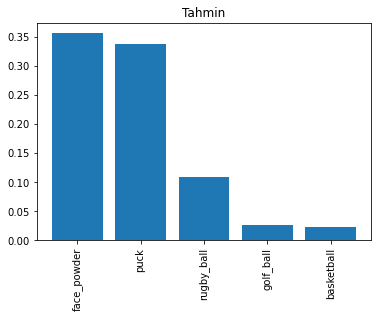

In [10]:
etiket = [i[1] for i in p[0]]
olasılık = [i[2] for i in p[0]]

plt.bar(etiket, olasılık)
plt.title("Tahmin")
plt.xticks(rotation=90)
plt.show();

1/1 [==============================] - 1s 974ms/step


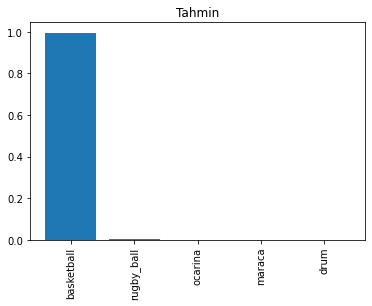

In [11]:
resim = image.load_img("110000081561235.jpg",color_mode="rgb",target_size=(224,224))
resim = image.img_to_array(resim)
resim = np.expand_dims(resim,axis=0)
resim = preprocess_input(resim)

tahmin = model.predict(resim)
p = decode_predictions(tahmin)
etiket = [i[1] for i in p[0]]
olasılık = [i[2] for i in p[0]]

plt.bar(etiket, olasılık)
plt.title("Tahmin")
plt.xticks(rotation=90)
plt.show();

In [12]:
p

[[('n02802426', 'basketball', 0.99594563),
  ('n04118538', 'rugby_ball', 0.00090667565),
  ('n03840681', 'ocarina', 0.00064715603),
  ('n03720891', 'maraca', 0.00044550386),
  ('n03249569', 'drum', 0.00038600835)]]

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

from keras.datasets import cifar10

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2, random_state=0)

In [21]:
vggmodel = VGG16(include_top=False, input_shape=(32,32,3), classes=10)

for i in vggmodel.layers:
    i.trainable = False
    
fully = vggmodel.output
fully = Flatten()(fully)
fully = Dense(512, activation="relu")(fully)
fully = Dropout(0.5)(fully)
fully = Dense(256, activation="relu")(fully)
fully = Dropout(0.3)(fully)
fully = Dense(10, activation="softmax")(fully)

model = Model(inputs=vggmodel.input, outputs=fully)

model.compile(optimizer=Adam(0.0001), loss="categorical_crossentropy",metrics=["accuracy"])

result = model.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val), verbose=0)

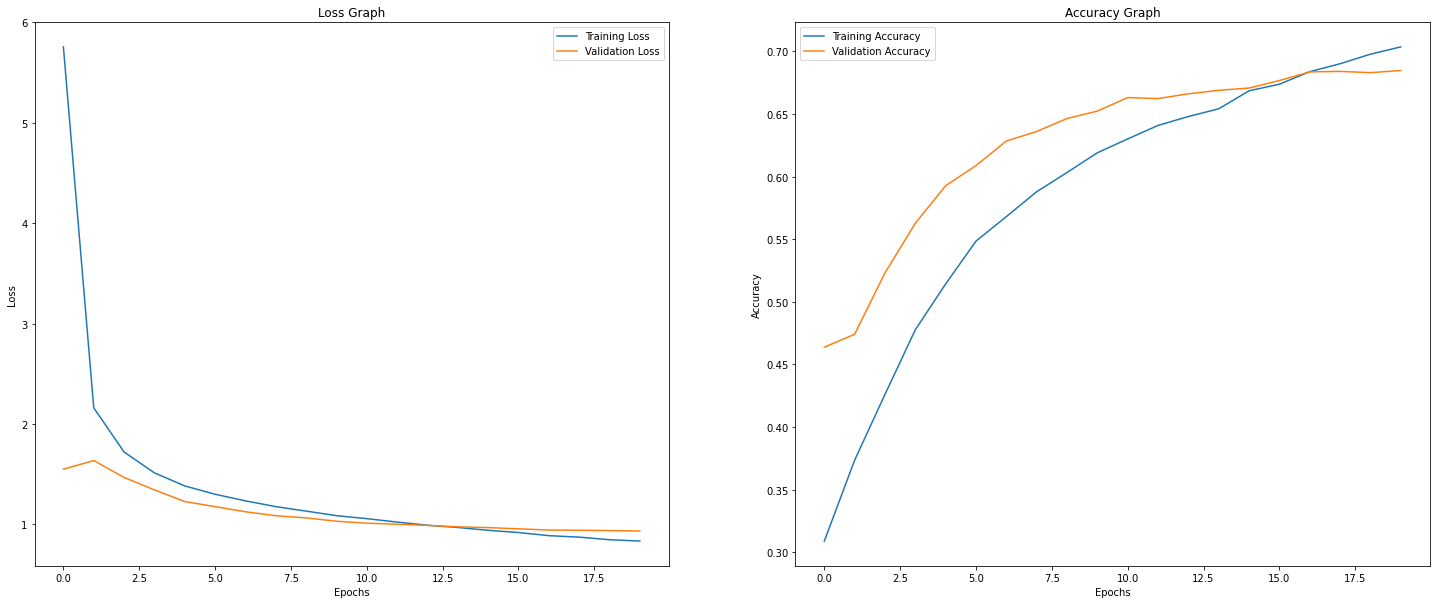

In [22]:
fig, ax = plt.subplots(1,2, figsize=(25,10))

ax[0].plot(result.history["loss"],label="Training Loss")
ax[0].plot(result.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"],label="Training Accuracy")
ax[1].plot(result.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show();